# I. IMPORT LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


# II. DATA LOADING

Taken dataset sourced from https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset

In [2]:
data = pd.read_csv('UsedCarsSA.csv')
df = pd.DataFrame(data)
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Make | Object | Car brand |
| Type | Object | Car-type brand |
| Year | Integer | Year of car manufacture |
| Origin | Object | Car importing country (Gulf / Saudi / Other / Unknown) |
| Color | Object | car color|
| Options | Object | Option used (Full Options / Semi-Full / Standard) |
| Engine_Size | Float | Car engine size |
| Fuel Type | Object | Fuel type|
| Gear_Type | Object | Type of gear used (Automatic / Manual) |
| Mileage | Integer |Distance traveled by vehicle (KM) |
| Region | Object | Used car sales area |
| Price | Integer | Used car prices (SAR) |
| Negotiable | Boolean | If True, then the price is 0 because the price is determined through negotiation | <br>

`Price` will be the label or target column to be predicted (dependent variable), and the other column will be predictor variable / independent variable which will predict `Price`.

## 2.1 Column Information

In [3]:
#Column Information Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


From the information above, we can see that this dataset consists of 13 columns, column names, along with each data type (8 object, 3 integer, 1 float, 1 boolean).

## 2.2 Adjust Columns' Name

In [4]:
#Rename Columns
df.rename(columns = {'Make' : 'Brand', 'Engine_Size': 'Engine Size','Fuel_Type':'Fuel Type', 'Gear_Type':'Gear Type' },inplace = True)
df

,Brand,Type,Year,Origin,Color,Options,Engine Size,Fuel Type,Gear Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


We have changed the Make column to Brand, and changed '_' to space.

## 2.3 Data Duplicates

In [5]:
# Data Duplicates Check
print("Amount of duplicate data: ", df.duplicated().sum())

Amount of duplicate data:  3


In [6]:
# Drop Duplicates
df.drop_duplicates(inplace = True)

print("Amount of duplicate data after dropped: ", sum(df.duplicated()))

Amount of duplicate data after dropped:  0


## 2.4 Missing Value

In [7]:
listdesc = []
for col in df.columns:
    listdesc.append([col,
                     df[col].dtypes,
                     df[col].isna().sum(),
                     round((df[col].isna().sum()/len(df)*100),2),
                     df[col].nunique(),
                     df[col].drop_duplicates().sample(1).values])

pd.DataFrame(listdesc, columns=['Data Features',
                               'Data Types',
                               'Null',
                               'Null Percentage',
                               'Unique',
                               'Unique Sample'])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Brand,object,0,0.0,59,[Jeep]
1,Type,object,0,0.0,381,[Furniture]
2,Year,int64,0,0.0,52,[2016]
3,Origin,object,0,0.0,4,[Unknown]
4,Color,object,0,0.0,15,[Bronze]
5,Options,object,0,0.0,3,[Full]
6,Engine Size,float64,0,0.0,75,[6.6]
7,Fuel Type,object,0,0.0,3,[Gas]
8,Gear Type,object,0,0.0,2,[Manual]
9,Mileage,int64,0,0.0,2175,[420000]


From the information above, it can be seen that the data is clean with the "Null" column with a value of 0 for each index.

## 2.5 Delete Price Value that has a value of 0

In [8]:
# count value "0" in "Price" column
count_zero = (df['Price'] == 0).sum()
count_zero

2526

there are 2526 data with "0" value

In [9]:
#Only using non-zero value
df = df[df['Price'] != 0]

In this dataset, if the negotiation process occurs then the price column will become 0 <br>
<br>
If we enter a value of 0 in the target price column it will cause overfitting,  While in *Machine Learning* we need exact numbers.

In [10]:
#Final data info before processing
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5506 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        5506 non-null   object 
 1   Type         5506 non-null   object 
 2   Year         5506 non-null   int64  
 3   Origin       5506 non-null   object 
 4   Color        5506 non-null   object 
 5   Options      5506 non-null   object 
 6   Engine Size  5506 non-null   float64
 7   Fuel Type    5506 non-null   object 
 8   Gear Type    5506 non-null   object 
 9   Mileage      5506 non-null   int64  
 10  Region       5506 non-null   object 
 11  Price        5506 non-null   int64  
 12  Negotiable   5506 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 564.6+ KB


## 2.6 Save Dataset Final for Deployment

In [11]:
df.to_csv('Dataset Final.csv', index = 'ignore')

# III. EXPLORATORY DATA ANALYSIS (EDA)

## 3.1 TOP 10 Brand 

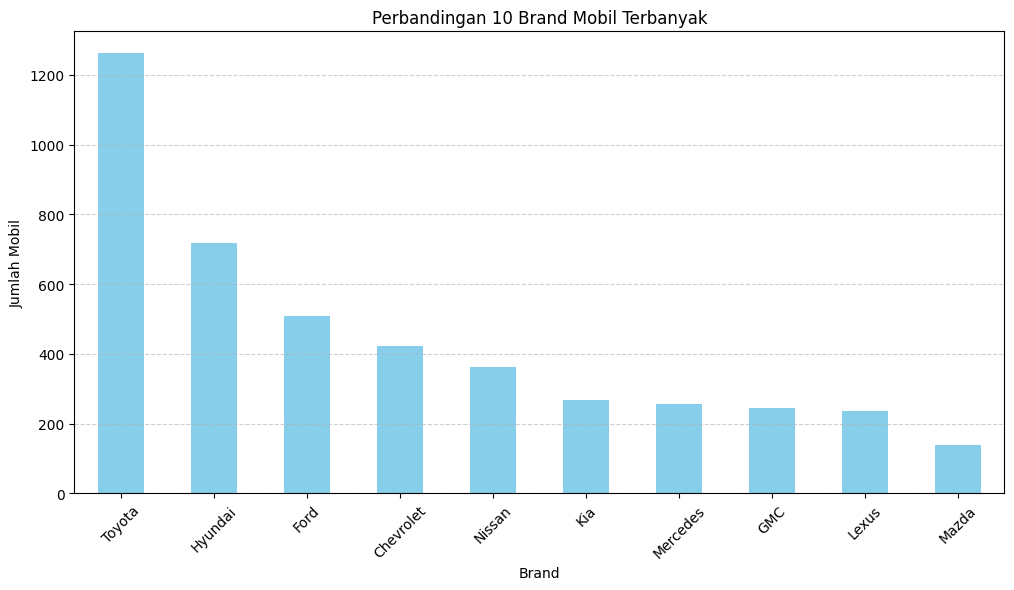

Detail Jumlah Mobil per brand:
 Toyota  Hyundai  Ford  Chevrolet  Nissan  Kia  Mercedes  GMC  Lexus  Mazda
   1262      719   510        423     362  268       256  246    237    139


In [12]:
# Count Brand values and take top 10 
brand_counts = df['Brand'].value_counts().nlargest(10)

# create plot
plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('Perbandingan 10 Brand Mobil Terbanyak')
plt.xlabel('Brand')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#Detail jumlah mobil per Brand
brand_counts_df = brand_counts.to_frame().transpose()
print('Detail Jumlah Mobil per brand:')
print(brand_counts_df.to_string(index=False))



From the information above we can find out top 10 most brands currently being sold. Toyota is the highest with 2037 cars and Mazda is in 10th place with 184 cars. <br>
We can conclude that the people of Saudi Arabia really like Toyota, this is closely related to the Toyota brand image which is reliable, easy to maintain and tough on all terrains.

## 3.2 Gear Type Comparison

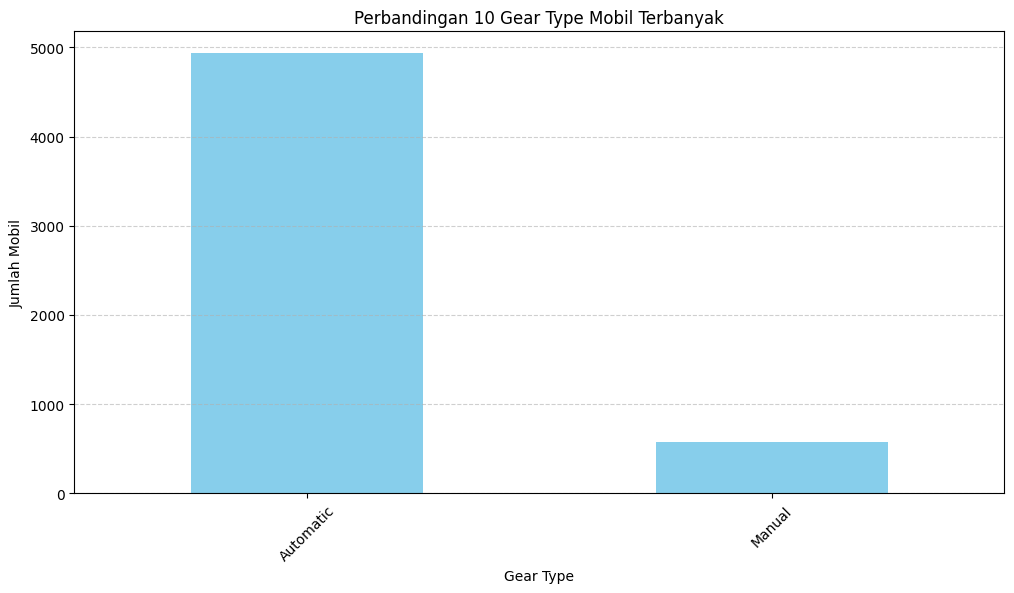

Detail Jumlah Mobil per Gear Type:
 Automatic  Manual
      4933     573


In [13]:
# Count Gear Type values and take top 10 
gear_counts = df['Gear Type'].value_counts().nlargest(10)

# create plot
plt.figure(figsize=(12, 6))
gear_counts.plot(kind='bar', color='skyblue')
plt.title('Perbandingan 10 Gear Type Mobil Terbanyak')
plt.xlabel('Gear Type')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#Detail jumlah mobil per Gear Type
gear_counts_df = gear_counts.to_frame().transpose()
print('Detail Jumlah Mobil per Gear Type:')
print(gear_counts_df.to_string(index=False))



The largest type of gear type is Automatic Transmission with 6968 cars, then Manual Transmission with 1064 cars. This shows that the people of Saudi Arabia prefer cars with automatic transmission because they are easier to drive, less tiring, and can be used by all people types.

## 3.3 Average and Median of Price

In [14]:
mean_price = df['Price'].mean()
median_price = df['Price'].median()
print ('Rata-rata harga mobil di Saudi Arabia adalah :', mean_price, 'dan median harganya adalah:', median_price)

Rata-rata harga mobil di Saudi Arabia adalah : 78334.94024700327 dan median harganya adalah: 58000.0


## 3.4 Relational Between Price and Brand

In [15]:
# Membuat dictionary untuk menyimpan harga mobil berdasarkan brand
brand_prices = {}
for brand in df['Brand'].unique():
    brand_prices[brand] = df[df['Brand'] == brand]['Price']

# Melakukan ANOVA
f_statistic, p_value = f_oneway(*brand_prices.values())

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 54.820156292936446
P-value: 0.0


With an F-statistic value of 40.0777 and a p-value of 0.0, we can conclude that there is a significant difference in car prices between different brands. This rejects the null hypothesis (H0) which states there is no significant difference.<br>
Usually brands that are more well-known on the market have higher used prices than brands that are less well-known

## 3.5 Relational Between Price and Gear Type

F-statistic: 81.91120516754067
P-value: 1.9389688498860726e-19


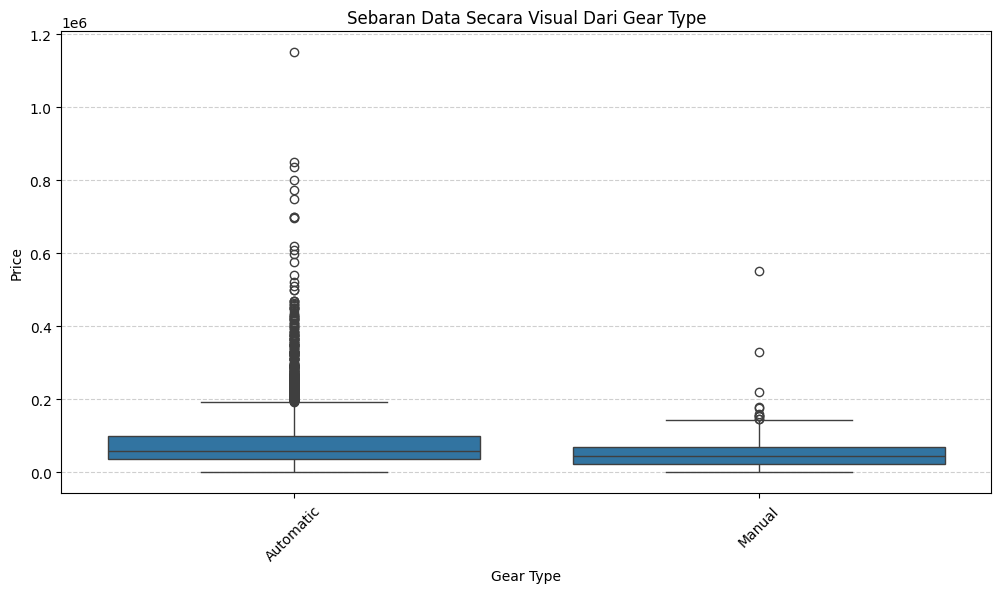

In [16]:
# Membuat dictionary untuk menyimpan harga mobil berdasarkan tipe gear
gear_prices = {}
for gear_type in df['Gear Type'].unique():
    gear_prices[gear_type] = df[df['Gear Type'] == gear_type]['Price']

# Melakukan ANOVA
f_statistic, p_value = f_oneway(*gear_prices.values())

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

#Membuat sebaran data secara visual dari Gear Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gear Type', y='Price', data=df)
plt.title('Sebaran Data Secara Visual Dari Gear Type')
plt.xlabel('Gear Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

With an F-statistic value of 161,539 and a very small p-value (1.1744442065035076e-36), we can conclude that there is a significant difference in car prices between various types of gear. This rejects the null hypothesis (H0) which states there is no significant difference. <br> 
From the data distribution, it can be seen that cars with automatic transmission have a higher price than manual transmission

# IV. FEATURES ENGINEERING

## 4.1 Cardinality

In [17]:
obj_col = df.select_dtypes(include=['object'])
for cat in obj_col:
  count = len(df[cat].unique())
  print(f"Cardinality of column {cat} is {count}")

Cardinality of column Brand is 57
Cardinality of column Type is 352
Cardinality of column Origin is 4
Cardinality of column Color is 15
Cardinality of column Options is 3
Cardinality of column Fuel Type is 3
Cardinality of column Gear Type is 2
Cardinality of column Region is 27


The Brand, Type, Color, and Region columns have high cardinality, while the Options, Fuel Type, and Gear Type columns have low cardinality

## 4.2 Split X (features) and Y (Target)

In [18]:
X = df.drop('Price', axis = 1)
y = df[['Price']]
print ('kolom X = ', X.columns)

kolom X =  Index(['Brand', 'Type', 'Year', 'Origin', 'Color', 'Options', 'Engine Size',
       'Fuel Type', 'Gear Type', 'Mileage', 'Region', 'Negotiable'],
      dtype='object')


## 4.3 Split X Numerical and X Categorical

In [19]:
X_num = X.select_dtypes(exclude = ['object']).columns.tolist()
X_cat = X.select_dtypes(include = ['object']).columns.tolist()

print ('Data Numerik = ', X_num)
print ('Data Kategorik = ', X_cat)

Data Numerik =  ['Year', 'Engine Size', 'Mileage', 'Negotiable']
Data Kategorik =  ['Brand', 'Type', 'Origin', 'Color', 'Options', 'Fuel Type', 'Gear Type', 'Region']


## 4.4 Split Train-set and Test-set

In [20]:
#Splitting between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
print('X_Train Size: ', X_train.shape)
print('X_Test Size: ', X_test.shape)

print('Y_Train Size: ', y_train.shape)
print('Y_Test Size: ', y_test.shape)

X_Train Size:  (3854, 12)
X_Test Size:  (1652, 12)
Y_Train Size:  (3854, 1)
Y_Test Size:  (1652, 1)


In [21]:
#get numeric and categorical column

num_columns = X_train.select_dtypes(exclude = ['object']).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

num_columns2 = X_test.select_dtypes(exclude = ['object']).columns.tolist()
cat_columns = X_test.select_dtypes(include = ['object']).columns.tolist()
print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['Year', 'Engine Size', 'Mileage', 'Negotiable']
Categorical Columns:  ['Brand', 'Type', 'Origin', 'Color', 'Options', 'Fuel Type', 'Gear Type', 'Region']


In [22]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Year,Engine Size,Mileage,Negotiable
384,2016,5.0,132000,False
859,2016,3.3,199,False
6897,2012,5.4,195000,False
2421,2016,4.0,243038,False
204,2017,2.4,110000,False
...,...,...,...,...
4366,2006,4.0,106000,False
1288,2005,5.3,84000,False
3114,2013,2.7,201000,False
4811,2016,5.7,117000,False


## 4.5  Handling Outliers

In [23]:
#Skew Check
X_train_num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in X_train_num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,Year,-2.737442
1,Engine Size,0.706762
2,Mileage,38.081020
3,Negotiable,0.000000


- The "Year" column has a skewness value of around -2.737, indicating that the distribution of car years is skewed to the left, meaning most of the cars in the dataset are probably older.
- The "Engine Size" column has a skewness value of around 0.707, indicating that the engine size distribution tends to be slightly skewed to the right, but not significantly so.
- The “Mileage” column has a skewness value of around 38,081, indicating that the mileage distribution is highly skewed to the right, meaning most cars in the dataset have low mileage.
- The “Negotiable” column has a skewness value of around 0.000, indicating that this variable does not have significant asymmetry in its distribution.<br>
<br>
The year and engine size columns have outliers but are not extreme, while Mileage has extreme outliers

In [24]:
#First, Capping with IQR
winsoriser1 = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=['Year', 'Engine Size', 'Mileage'],
                            missing_values='ignore')

X_train = winsoriser1.fit_transform(X_train)
X_test = winsoriser1.transform(X_test)

In [25]:
winsoriser2 = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=['Year', 'Engine Size', 'Mileage'],
                            missing_values='ignore')

X_train = winsoriser2.fit_transform(X_train)
X_test = winsoriser2.transform(X_test)

In [26]:
#recheck skewness after capping
X_train_num_cols2 = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in X_train_num_cols2:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,Year,-1.342547
1,Engine Size,0.622364
2,Mileage,1.112694
3,Negotiable,0.000000


There has been decreased in skewness, but all columns are still skewed

## 4.6 Missing Value

In [27]:
X_train.isnull().sum()

Brand          0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine Size    0
Fuel Type      0
Gear Type      0
Mileage        0
Region         0
Negotiable     0
dtype: int64

In [28]:
X_test.isnull().sum()

Brand          0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine Size    0
Fuel Type      0
Gear Type      0
Mileage        0
Region         0
Negotiable     0
dtype: int64

In [29]:
y_train.isnull().sum()

Price    0
dtype: int64

In [30]:
y_test.isnull().sum()

Price    0
dtype: int64

## 4.7 Feature Selection

In this section we will focus to p-value is less than alpha (the chosen significance level 0.05), we can reject the null hypothesis. In this context, the null hypothesis is that there is no correlation between that column and Price.

In [31]:
#Relational between price and Categorical Column 
categorical_cols = ['Brand', 'Type', 'Color', 'Options', 'Fuel Type', 'Gear Type', 'Region', 'Origin']

p_values = []
interpretations = []
cols = []

for col in categorical_cols:
    groups = [df.loc[df[col] == val, 'Price'] for val in df[col].unique()]
    f_statistic, p_value = f_oneway(*groups)
    
    p_values.append(p_value)
    cols.append(col)
    
    if p_value < 0.05:
        interpretations.append('Ada korelasi')
    else:
        interpretations.append('Tidak ada korelasi')

result_df = pd.DataFrame({'Nama Kolom': cols, 'P-Value': p_values, 'Interpretasi': interpretations})
print(result_df)


  Nama Kolom        P-Value  Interpretasi
0      Brand   0.000000e+00  Ada korelasi
1       Type   0.000000e+00  Ada korelasi
2      Color   2.977030e-24  Ada korelasi
3    Options  2.776395e-145  Ada korelasi
4  Fuel Type   2.600942e-03  Ada korelasi
5  Gear Type   1.938969e-19  Ada korelasi
6     Region   1.576403e-15  Ada korelasi
7     Origin   4.728863e-38  Ada korelasi


The anova method is used to examine the relationship between the Price (numerical) column and the categorical columns. The result was that the Fuel Type column had no relationship with Price because it had a P-Value of 4.439905e-01. The Brand and Type columns have the strongest correlation with Price for the reasons I mentioned in the EDA section

In [32]:
#Relational between price and numerical Column 
numeric_cols = ['Year', 'Engine Size', 'Mileage', 'Negotiable']
p_values = []
correlations = []
interpretations = []

for col in numeric_cols:
    correlation, p_value = spearmanr(df[col], df['Price'])
    correlations.append(correlation)
    p_values.append(p_value)
    
    if p_value < 0.05:
        interpretations.append('Ada korelasi')
    else:
        interpretations.append('Tidak ada korelasi')

result_df = pd.DataFrame({'Nama Kolom': numeric_cols, 'Korelasi Spearman': correlations, 'P-Value': p_values, 'Interpretasi': interpretations})
print(result_df)

    Nama Kolom  Korelasi Spearman        P-Value        Interpretasi
0         Year           0.419532  1.069650e-233        Ada korelasi
1  Engine Size           0.382309  3.953088e-191        Ada korelasi
2      Mileage          -0.266557   3.282850e-90        Ada korelasi
3   Negotiable                NaN            NaN  Tidak ada korelasi


/var/folders/x0/brj3ylkn29533l3fk8w1scqc0000gn/T/ipykernel_1750/4169812480.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = spearmanr(df[col], df['Price'])


The Spearman method is used to find the relationship between the Price column (numerical) and the numerical columns. The result is that all columns have a relationship with Price because they have a P-Value <0.05. The Year column has the strongest correlation and is directly proportional to Price, the same car in a different year means that a younger car will have a higher price. Likewise with Engine Size, the bigger the engine size number, the higher the price will be. As for mileage, the smaller the mileage number, the higher the price

In [33]:
X_train.drop(columns = ['Fuel Type'], inplace = True)
X_test.drop(columns = ['Fuel Type'], inplace = True)

X_train_cat.drop(columns = ['Fuel Type'], inplace = True)
X_test_cat.drop(columns = ['Fuel Type'], inplace = True)

Base on relational test before, we deleted Fuel Type feature because unrelational to target

In [34]:
#Delete Negotiable and Origin Column in X_train and X_test
X_train.drop(columns = ['Negotiable', 'Origin'], inplace = True)
X_test.drop(columns = ['Negotiable', 'Origin'], inplace = True)

#Delete Origin Column in X_train_cat and X_test_cat
X_train_cat.drop(columns = ['Origin'], inplace = True)
X_test_cat.drop(columns = ['Origin'], inplace = True)

#Delete Negotiable Column in X_train_num and X_test_num
X_train_num.drop(columns = ['Negotiable'], inplace = True)
X_test_num.drop(columns = ['Negotiable'], inplace = True)


print ('Final Column X_train:', X_train.columns)
print ('Final Column X_test:', X_test.columns)

Final Column X_train: Index(['Brand', 'Type', 'Year', 'Color', 'Options', 'Engine Size', 'Gear Type',
       'Mileage', 'Region'],
      dtype='object')
Final Column X_test: Index(['Brand', 'Type', 'Year', 'Color', 'Options', 'Engine Size', 'Gear Type',
       'Mileage', 'Region'],
      dtype='object')



Base on my personal judgement, we need to delete any columns that are not needed based on the domain knowledge we have.<br>
<br>
**Negotiable** <br>
We will remove the "Negotiable" feature because in making machine learning models we must have a definite price in selling used cars. Judging from the datasets, the "Price" value is zero because the "Negotiable" feature is True. This indicates that the price is determined through negotiations which makes the certainty of the price of a used car biased. Therefore we will remove the feature "Negotiable".<br>
<br>
**Origin** <br>
Based on the article published on [kenresearch.com](https://www.kenresearch.com/blog/2020/09/future-of-saudi-arabia-used-car-market-growth-rate-ken-research/) , there is no parameter or effect of used car sales in Saudi Arabia based on car importing countries. Therefore we will remove the "Origin" feature.

## 4.8 Feature Transformer

In [35]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
    ('scaler', MinMaxScaler(), selector(dtype_exclude='object')),
    ('encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), selector(dtype_include='object'))
])

# V. MODEL DEFINITION

## 5.1 Random Forest

In [36]:
rf_pipeline = Pipeline([
    ('preprocessor', transformer),  
    ('rf', RandomForestRegressor())  
])

# 5.2 Decision Tree

In [37]:
dt_pipeline = Pipeline([
    ('preprocessor', transformer),  
    ('dt', DecisionTreeRegressor())  
])

# 5.3 KNN

In [38]:
knn_pipeline = Pipeline([
    ('preprocessor', transformer),  
    ('knn', KNeighborsRegressor())  
])

# 5.4 SVM

In [39]:
svm_pipeline = Pipeline([
    ('preprocessor', transformer),  
    ('svm', SVR())  
])

## 5.5 XGBoost

In [40]:
#Making pipeline for XGBoost
xgb_pipeline = Pipeline([
('preprocessor', transformer),
('xgb', XGBRegressor())
])

# VI. MODEL TRAINING - Base Model

In [41]:
# Random Forest Training
rf_pipeline.fit(X_train, y_train)
print('Training Score: ',round(rf_pipeline.score(X_train, y_train),4))
print('Testing Score: ', round(rf_pipeline.score(X_test, y_test),4))

/Users/daniyalkahfi/miniconda3/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Score:  0.9676
Testing Score:  0.6836


The Random Forest model that we use produces overfitting. Overfitting occurs when a model is so complex that it is able to “memorize” the training data very well, but cannot generalize well to new data.

In [42]:
# Decision Tree Training
dt_pipeline.fit(X_train, y_train)
print('Training Score: ',round(dt_pipeline.score(X_train, y_train),4))
print('Testing Score: ', round(dt_pipeline.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.5361


Decision Tree also shows overfitting because the training score and test score are very different

In [43]:
# KNN Training Training
knn_pipeline.fit(X_train, y_train)
print('Training Score: ',round(knn_pipeline.score(X_train, y_train),4))
print('Testing Score: ', round(knn_pipeline.score(X_test, y_test),4))

Training Score:  0.6079
Testing Score:  0.3026


KNN also shows overfitting because the training score and test score are very different

In [44]:
#SVM Training
svm_pipeline.fit(X_train, y_train)
print('Training Score: ',round(svm_pipeline.score(X_train, y_train),4))
print('Testing Score: ', round(svm_pipeline.score(X_test, y_test),4))


/Users/daniyalkahfi/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score:  -0.0783
Testing Score:  -0.0612


SVM shows Underfitting. Underfitting occurs when the model is too simple to learn the patterns present in the training data, so it cannot generalize well to the testing data. This can be seen from the low scores on both training and testing data.

In [45]:
#XGBoost Training
xgb_pipeline.fit(X_train, y_train)
print('Training Score: ',round(xgb_pipeline.score(X_train, y_train),4))
print('Testing Score: ', round(xgb_pipeline.score(X_test, y_test),4))

Training Score:  0.988
Testing Score:  0.7693


XGBoost also shows overfitting because the training score and test score are different, but not too extreme like another model

# VII. MODEL EVALUATION
In this section we will carry out Cross-validation with the RMSE (Root Mean Squared Error) and R2 score (Coefficient of Determination) methods as evaluation metrics because they provide different information about the model's performance in predicting prices:

    * RMSE: Used to measure how well the model is at predicting the exact value of the price. RMSE calculates the root of the mean of the squares of the differences between the predicted value and the actual value. The lower the RMSE, the better the model is at accurately predicting prices.
    
    * R2 Score: Used to measure how well the variability in price data is explained by the model. The R2 score provides information about how well the predictor variables in the model explain price variations.

## 7.1 Random Forest 

In [46]:
# Prediksi menggunakan model Random Forest Regressor
y_pred_rf = rf_pipeline.predict(X_test)

# Menghitung MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Menghitung RMSE
rmse_rf = np.sqrt(mse_rf)

# Menghitung R2 score
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print("Root Mean Squared Error:", rmse_rf)
print("R2 Score:", r2_rf)


Random Forest Regressor:
Root Mean Squared Error: 42061.08840253896
R2 Score: 0.6835877310420518


## 7.2 Decision Tree 

In [47]:
# Prediksi menggunakan model Decision Tree Regressor
y_pred_dt = dt_pipeline.predict(X_test)

# Menghitung MSE
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Menghitung RMSE
rmse_dt = np.sqrt(mse_dt)

# Menghitung R2 score
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor:")
print("Root Mean Squared Error:", rmse_dt)
print("R2 Score:", r2_dt)


Decision Tree Regressor:
Root Mean Squared Error: 50931.63177215684
R2 Score: 0.536053948559127


## 7.3 KNN 

In [48]:
# Prediksi menggunakan model KNN Regressor
y_pred_knn = knn_pipeline.predict(X_test)

# Menghitung MSE
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Menghitung RMSE
rmse_knn = np.sqrt(mse_knn)

# Menghitung R2 score
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regressor:")
print("Root Mean Squared Error:", rmse_knn)
print("R2 Score:", r2_knn)


KNN Regressor:
Root Mean Squared Error: 62446.768933061714
R2 Score: 0.3025513361444988


## 7.4 SVM 

In [49]:
# Prediksi menggunakan model SVR
y_pred_svr = svm_pipeline.predict(X_test)

# Menghitung MSE
mse_svr = mean_squared_error(y_test, y_pred_svr)

# Menghitung RMSE
rmse_svr = np.sqrt(mse_svr)

# Menghitung R2 score
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR:")
print("Root Mean Squared Error:", rmse_svr)
print("R2 Score:", r2_svr)


SVR:
Root Mean Squared Error: 77029.5830316441
R2 Score: -0.06122481278564007


## 7.5 XGBoost

In [50]:
# Prediksi menggunakan model Random Forest Regressor
y_pred_xgb = xgb_pipeline.predict(X_test)

# Menghitung MSE
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Menghitung RMSE
rmse_xgb = np.sqrt(mse_xgb)

# Menghitung R2 score
r2_xgb= r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor:")
print("Root Mean Squared Error:", rmse_xgb)
print("R2 Score:", r2_xgb)


XGBoost Regressor:
Root Mean Squared Error: 35915.0793532322
R2 Score: 0.7693008669568498


## 7.6 Comparison Cross Validation Before Tuning

In [51]:
compar_result = {
    'Model': ['Random Forest',  'Decision Tree',  'KNN',  'SVR',  'XGboost'],
    'RMSE': [rmse_rf, rmse_dt, rmse_knn,  rmse_svr, rmse_xgb, ],
    'R2 Score': [r2_rf, r2_dt, r2_knn,  r2_svr, r2_xgb, ],

}

compare_result = pd.DataFrame(compar_result)
print('COMPARISON BEFORE TUNING')
print(compare_result)

COMPARISON BEFORE TUNING
           Model          RMSE  R2 Score
0  Random Forest  42061.088403  0.683588
1  Decision Tree  50931.631772  0.536054
2            KNN  62446.768933  0.302551
3            SVR  77029.583032 -0.061225
4        XGboost  35915.079353  0.769301


From the model evaluation results that we provide, it can be seen that XGboost Regressor has the lowest RMSE compared to Decision Tree Regressor, KNN Regressor, and SVR. This shows that on the dataset and modeling we use, XGboost Regressor has better performance in predicting prices.

# VIII. HYPERPARAMETER TUNING

From previous section, we knew that XGBoost is the best base model, so we will process for Hyperparameter Tuning.

## 8.1 XGBoost Tuning

In [52]:
param_grid_xgboost = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__max_depth': [3, 5, 7],
    'xgb__colsample_bytree': [0.5, 0.7, 1.0],
    'xgb__subsample': [0.5, 0.7, 1.0]
}

grid_search_xgboost = GridSearchCV(xgb_pipeline, param_grid_xgboost, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgboost.fit(X_train, y_train)

best_xgboost_model = grid_search_xgboost.best_estimator_
y_pred_xgboost_tuned = best_xgboost_model.predict(X_test)

rmse_xgboost_tuned = np.sqrt(mean_squared_error(y_test, y_pred_xgboost_tuned))
r2_xgboost_tuned = r2_score(y_test, y_pred_xgboost_tuned)

print("XGBoost Tuned Regressor:")
print(f"RMSE: {rmse_xgboost_tuned}")
print(f"R2 Score: {r2_xgboost_tuned}\n")

XGBoost Tuned Regressor:
RMSE: 33550.13036759717
R2 Score: 0.7986828720730391



## 8.2 Comparison Cross Validation After Tuning

In [53]:
compar_result2 = {
    'Model': ['Random Forest', 'Decision Tree',  'KNN', 'SVR', 'XGboost', 'XGboost Tuned'],
    'RMSE': [rmse_rf, rmse_dt, rmse_knn,  rmse_svr, rmse_xgb, rmse_xgboost_tuned],
    'R2 Score': [r2_rf, r2_dt, r2_knn, r2_svr,  r2_xgb, r2_xgboost_tuned],

}

compare_result2 = pd.DataFrame(compar_result2)

print(compare_result2)

           Model          RMSE  R2 Score
0  Random Forest  42061.088403  0.683588
1  Decision Tree  50931.631772  0.536054
2            KNN  62446.768933  0.302551
3            SVR  77029.583032 -0.061225
4        XGboost  35915.079353  0.769301
5  XGboost Tuned  33550.130368  0.798683


From the results obtained, the XGBoost Tuned model has the best performance based on both evaluation metrics, namely RMSE and R2 Score. Although the difference with the XGBoost model before tuning is not significant, the hyperparameter tuning results in a slight increase in R2 Score and a slight reduction in RMSE, indicating a small improvement in model performance. So, overall, the hyperparameter-tuned XGBoost model is the best choice among the evaluated models in this case.

# IX. MODEL SAVING

In [54]:
import pickle as pkl
with open('best_model.pkl', 'wb') as f:
    pkl.dump(best_xgboost_model, f)

# X. MODEL INFERENCE
Model inference shows in file names `Saudi Arabia Used Car Prediction_inf.ipynb`

# XI. CONCLUSION

1. Price prediction typically does not depend on a strictly linear relationship. Notwithstanding the possibility of a few factors having a linear relationship with price, relationships between several features and price are frequently complex and non-linear.

2. There are numerous factors that can affect the price of a cheap mobile phone, and interactions between these factors might result in nonlinear patterns in the data. In the case of used cars, the price is not only determined by the year of purchase or the number of miles that have already been driven; it can also be affected by the condition, model, merek, and other factors.

3. Based on the analysis and literature that I have read, the 
    * RandomForestRegressor: Suitable for data with complex and varied features and can effectively handle overfitting. However, it may require precise parameter tweaking to achieve ideal work performance.

    * KNeighborsRegressor: Suitable for data with local patterns and when nearest neighbors are important in making predictions. However, it is sensitive to the scale of the data and may require further processing such as scaling.

    * SVR: Suitable for data with non-linear relationships and when there are outliers in the data. SVR has the flexibility to choose a kernel function that fits our data. However, careful parameter tuning may be required for optimal results.

    * DecisionTreeRegressor: Suitable for data with non-linear and complex relationships between features and targets. However, it tends to be prone to overfitting, especially if not well-tuned.

4. Used Cross-validation with the RMSE (Root Mean Squared Error) and R2 score (Coefficient of Determination) methods as evaluation metrics because they provide different information about the model's performance in predicting prices:

    * RMSE: Used to measure how well the model is at predicting the exact value of the price. RMSE calculates the root of the mean of the squares of the differences between the predicted value and the actual value. The lower the RMSE, the better the model is at accurately predicting prices.

    * R2 Score: Used to measure how well the variability in price data is explained by the model. The R2 score provides information about how well the predictor variables in the model explain price variations.
5. The best cross validation base model result is XGBoost with an RMSE score of 35915.079353 and an R2 score of 0.769301.
    
6. The best model results used are Tuned Extreme Gradient Boost (XGBoost) Regression with RMSE score = 33550.130368 and R2 score = 0.798683

7. Cross validation results show significant improvements after tuning the XGBoost model. This improvement can be seen from a decrease in RMSE from around 35915 to around 33550, as well as an increase in the R-squared score from around 0.769 to around 0.799. This shows that the tuned XGBoost model is better at predicting prices and explaining price variations in the data.

# XII. CONCEPTUAL PROBLEM

1. Explain the background of bagging and how bagging works! <br>
- Bagging Background and How it Works:<br>
Bagging (Bootstrap Aggregating) is an ensemble learning technique used to improve the performance of a prediction model by combining several models generated from bootstrap samples from train data.
- How bagging works is as follows:
    * Create several different train data sets randomly by taking bootstrap samples from the train data.
    * Train a base model on each train data set.
    * Combines the prediction results from each base model (for example, by averaging for regression or voting for classification) to make a final prediction.

2. Explain the difference in how the Random Forest algorithm works and the boosting algorithm you chose!
- Difference between Random Forest and Boosting:
Random Forest is a type of ensemble learning algorithm that uses bagging techniques to create a number of independent decision trees and combine the results.<br>
- Boosting is an ensemble learning technique where models are built sequentially and each subsequent model attempts to correct the errors made by the previous model.
- The main difference between Random Forest and Boosting is in the way the models are built. Random Forest builds decision trees independently, while Boosting builds sequential models, with each model focusing on data samples that were difficult to predict by the previous model.

3. Explain what is meant by Cross Validation!
- Cross Validation is a technique used to evaluate the performance of a machine learning model by dividing data into several subsets, training the model on several subsets, and testing the model on subsets that are not involved in the train data.
- The goal of Cross Validation is to get a better estimate of how well a model will perform on data it has never seen before.
- Cross Validation steps are:
    * Separates data into k subsets of equal size.
    * Repeat k iterations, where each iteration uses one subset as test data and the other as training data.
    * Calculates evaluation metrics (e.g., accuracy, RMSE) for each iteration.
    * Calculates the average of the evaluation metrics to obtain an estimate of overall model performance.